Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-HIGH,1,IT IS WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0
1,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-MIDDLE,0,IT IS WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0
2,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
3,2011,EIXAMPLE,0.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0
4,2011,EIXAMPLE,1.0,0,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0


In [5]:
data.shape

(4531, 35)

In [6]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [7]:
x_var = data.columns.tolist()

In [8]:
for i in ['ANY', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [9]:
x = data[x_var]

In [10]:
y = data['Would_not_stay_in_the_neighborhood']

In [11]:
x = pd.get_dummies(x, drop_first = True)

In [12]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.303290
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.185      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2846.4097  
Date:                  2021-04-14 08:39                      BIC:                 3160.9259  
No. Observations:      4531                                  Log-Likelihood:      -1374.2    
Df Model:              48                                    LL-Null:             -1686.8    
Df Residuals:          4482                                  LLR p-value:         1.6891e-101
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [13]:
result.pvalues.sort_values(ascending=False)

GARBAGE COLLECTION_GOOD                         9.565946e-01
BCN_over_barri_evolution                        8.277302e-01
Barri_transport_GOOD                            7.110984e-01
NOM_DISTRICTE_SANT ANDREU                       6.851197e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  6.727937e-01
Barri_evolution_IT IS THE SAME                  6.566945e-01
NOM_DISTRICTE_GRÀCIA                            6.269755e-01
Owns_a_car                                      6.105392e-01
FACADES AND BUILDING CONSERVATION_GOOD          5.802340e-01
NOM_DISTRICTE_NOU BARRIS                        5.629945e-01
MUNICIPAL POLICE_GOOD                           5.230069e-01
CIRCULATION_GOOD                                5.077689e-01
Monthly_family_income_< 1000 EUROS              4.687177e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  3.860715e-01
Gender                                          3.260050e-01
BCN_over_barri_future                           3.257538e-01
PUBLIC LIGHTING_GOOD    

In [14]:
for i in ['GARBAGE COLLECTION', 'BCN_over_barri_evolution', 'Barri_transport', 'Barri_evolution', 'Owns_a_car']:
    x_var.remove(i)

In [15]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [16]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.303848
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.184      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2837.4685  
Date:                  2021-04-14 08:39                      BIC:                 3107.0538  
No. Observations:      4531                                  Log-Likelihood:      -1376.7    
Df Model:              41                                    LL-Null:             -1686.8    
Df Residuals:          4489                                  LLR p-value:         1.5825e-104
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [17]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_SANT ANDREU                       7.352280e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  6.920358e-01
NOM_DISTRICTE_NOU BARRIS                        5.903993e-01
FACADES AND BUILDING CONSERVATION_GOOD          5.816243e-01
NOM_DISTRICTE_GRÀCIA                            5.603563e-01
CIRCULATION_GOOD                                5.591326e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  4.512783e-01
MUNICIPAL POLICE_GOOD                           4.425924e-01
Gender                                          4.016018e-01
Monthly_family_income_< 1000 EUROS              3.964083e-01
BCN_over_barri_future                           3.573736e-01
House_size_< 50 M2                              2.674993e-01
STREETS CLEANING_GOOD                           2.601300e-01
House_size_51-100 M2                            2.588541e-01
PUBLIC LIGHTING_GOOD                            2.551254e-01
MUNICIPAL MARKETS_GOOD                          2.273961e-01
ASPHALT AND STREET CONSE

In [18]:
for i in ['FACADES AND BUILDING CONSERVATION', 'MUNICIPAL POLICE', 'CIRCULATION', 'Gender']:
    x_var.remove(i)

In [19]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [20]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.304045
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.183      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2831.2597  
Date:                  2021-04-14 08:39                      BIC:                 3075.1702  
No. Observations:      4531                                  Log-Likelihood:      -1377.6    
Df Model:              37                                    LL-Null:             -1686.8    
Df Residuals:          4493                                  LLR p-value:         1.3727e-106
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [21]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_SANT ANDREU                       7.649836e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  7.148756e-01
NOM_DISTRICTE_NOU BARRIS                        5.986619e-01
NOM_DISTRICTE_GRÀCIA                            5.018045e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  4.674053e-01
Monthly_family_income_< 1000 EUROS              4.360569e-01
BCN_over_barri_future                           3.849977e-01
House_size_< 50 M2                              2.848216e-01
House_size_51-100 M2                            2.651160e-01
STREETS CLEANING_GOOD                           2.311263e-01
MUNICIPAL MARKETS_GOOD                          2.294668e-01
PUBLIC LIGHTING_GOOD                            2.249866e-01
ASPHALT AND STREET CONSERVATION_GOOD            1.872462e-01
Monthly_family_income_2001-3000 EUROS           1.636005e-01
NOM_DISTRICTE_SANT MARTÍ                        1.220108e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    1.046799e-01
GREEN AREAS_GOOD        

In [22]:
for i in ['BCN_over_barri_future', 'House_size', 'MUNICIPAL MARKETS', 'STREETS CLEANING']:
    x_var.remove(i)

In [23]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [24]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.304796
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.181      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2826.0602  
Date:                  2021-04-14 08:39                      BIC:                 3031.4586  
No. Observations:      4531                                  Log-Likelihood:      -1381.0    
Df Model:              31                                    LL-Null:             -1686.8    
Df Residuals:          4499                                  LLR p-value:         5.2546e-109
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [25]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_SANTS - MONTJUÏC                  7.856279e-01
NOM_DISTRICTE_SANT ANDREU                       6.580760e-01
NOM_DISTRICTE_NOU BARRIS                        6.151185e-01
Monthly_family_income_< 1000 EUROS              5.122511e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  4.785962e-01
NOM_DISTRICTE_GRÀCIA                            4.752130e-01
Social_class_MIDDLE-MIDDLE                      2.423109e-01
PUBLIC LIGHTING_GOOD                            2.334467e-01
ASPHALT AND STREET CONSERVATION_GOOD            2.118777e-01
Social_class_MIDDLE-LOW                         1.937336e-01
Social_class_LOW                                1.676865e-01
Monthly_family_income_2001-3000 EUROS           1.433434e-01
BUS_GOOD                                        1.274790e-01
Social_class_MIDDLE-HIGH                        1.169051e-01
NOM_DISTRICTE_SANT MARTÍ                        1.168747e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    9.305967e-02
Living_alone            

In [26]:
for i in ['PUBLIC LIGHTING', 'ASPHALT AND STREET CONSERVATION', 'Monthly_family_income', 'Social_class']:
    x_var.remove(i)

In [27]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [28]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306263
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.177      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2821.3589  
Date:                  2021-04-14 08:39                      BIC:                 2968.9890  
No. Observations:      4531                                  Log-Likelihood:      -1387.7    
Df Model:              22                                    LL-Null:             -1686.8    
Df Residuals:          4508                                  LLR p-value:         1.9365e-112
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [29]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_GRÀCIA                            5.822321e-01
Living_alone                                    4.725956e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  4.585485e-01
NOM_DISTRICTE_SANT ANDREU                       4.066401e-01
NOM_DISTRICTE_NOU BARRIS                        2.887351e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  1.991076e-01
BCN_over_barri_satisfaction_of_living           9.896220e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    8.234434e-02
NOM_DISTRICTE_SARRIÀ - SANT GERVASI             5.947893e-02
NOM_DISTRICTE_SANT MARTÍ                        4.614597e-02
BCN_over_barri_transport                        3.427017e-02
GREEN AREAS_GOOD                                3.201840e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       2.673117e-02
BUS_GOOD                                        2.285741e-02
Time_living_in_barri_MORE THAN 10 YEARS         1.667234e-02
Barri_future_IT WILL STAY THE SAME              1.581356e-02
NOM_DISTRICTE_EIXAMPLE  

In [30]:
for i in ['Living_alone']:
    x_var.remove(i)

In [31]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [32]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306320
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.177      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2819.8721  
Date:                  2021-04-14 08:39                      BIC:                 2961.0834  
No. Observations:      4531                                  Log-Likelihood:      -1387.9    
Df Model:              21                                    LL-Null:             -1686.8    
Df Residuals:          4509                                  LLR p-value:         4.5883e-113
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [33]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_GRÀCIA                            5.670791e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  4.518141e-01
NOM_DISTRICTE_SANT ANDREU                       3.926385e-01
NOM_DISTRICTE_NOU BARRIS                        2.792448e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  1.935683e-01
BCN_over_barri_satisfaction_of_living           8.591280e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    8.553691e-02
NOM_DISTRICTE_SARRIÀ - SANT GERVASI             5.855679e-02
NOM_DISTRICTE_SANT MARTÍ                        4.495780e-02
GREEN AREAS_GOOD                                3.418710e-02
BCN_over_barri_transport                        3.220813e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       2.765699e-02
BUS_GOOD                                        2.462234e-02
Barri_future_IT WILL STAY THE SAME              1.662007e-02
Time_living_in_barri_MORE THAN 10 YEARS         1.470394e-02
NOM_DISTRICTE_EIXAMPLE                          1.379158e-02
NOM_DISTRICTE_LES CORTS 

In [34]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
BCN_over_barri_satisfaction_of_living            0.0317      0.018      1.718      0.086      -0.004       0.068
BCN_over_barri_transport                         0.0277      0.013      2.143      0.032       0.002       0.053
NOM_DISTRICTE_EIXAMPLE                          -0.0447      0.018     -2.466      0.014      -0.080      -0.009
NOM_DISTRICTE_GRÀCIA                             0.0121      0.021      0.572      0.567      -0.029       0.053
NOM_DISTRICTE_HORTA - GUINARDÓ                  -0.0243      0.019     -1.301      0.193      -0.061      

In [35]:
result.pred_table()

array([[3910.,   65.],
       [ 464.,   92.]])

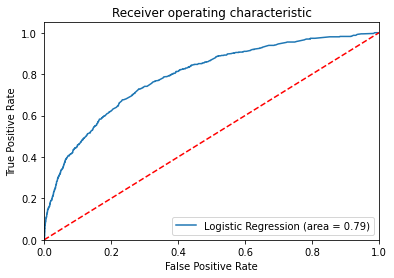

In [36]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()